In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

SCALE = 256

# Exercise 2.1.1

In [2]:
# Load the grayscale image
img = cv2.imread('images/Camera Man.bmp', 0)
img_copy = copy.deepcopy(img)


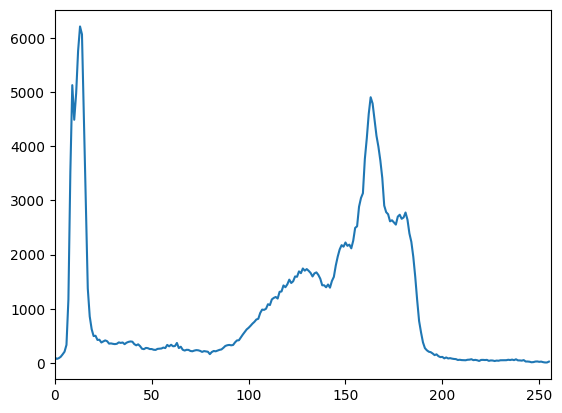

In [3]:
# Compute the histogram using OpenCV's calcHist function
hist = [0]*SCALE
for row in img:
    for column in row:
        hist[column] += 1

hist = np.asanyarray(hist)

# Display the histogram using matplotlib
plt.plot(hist)
plt.xlim([0, SCALE])
plt.show()

# Exercise 2.1.2

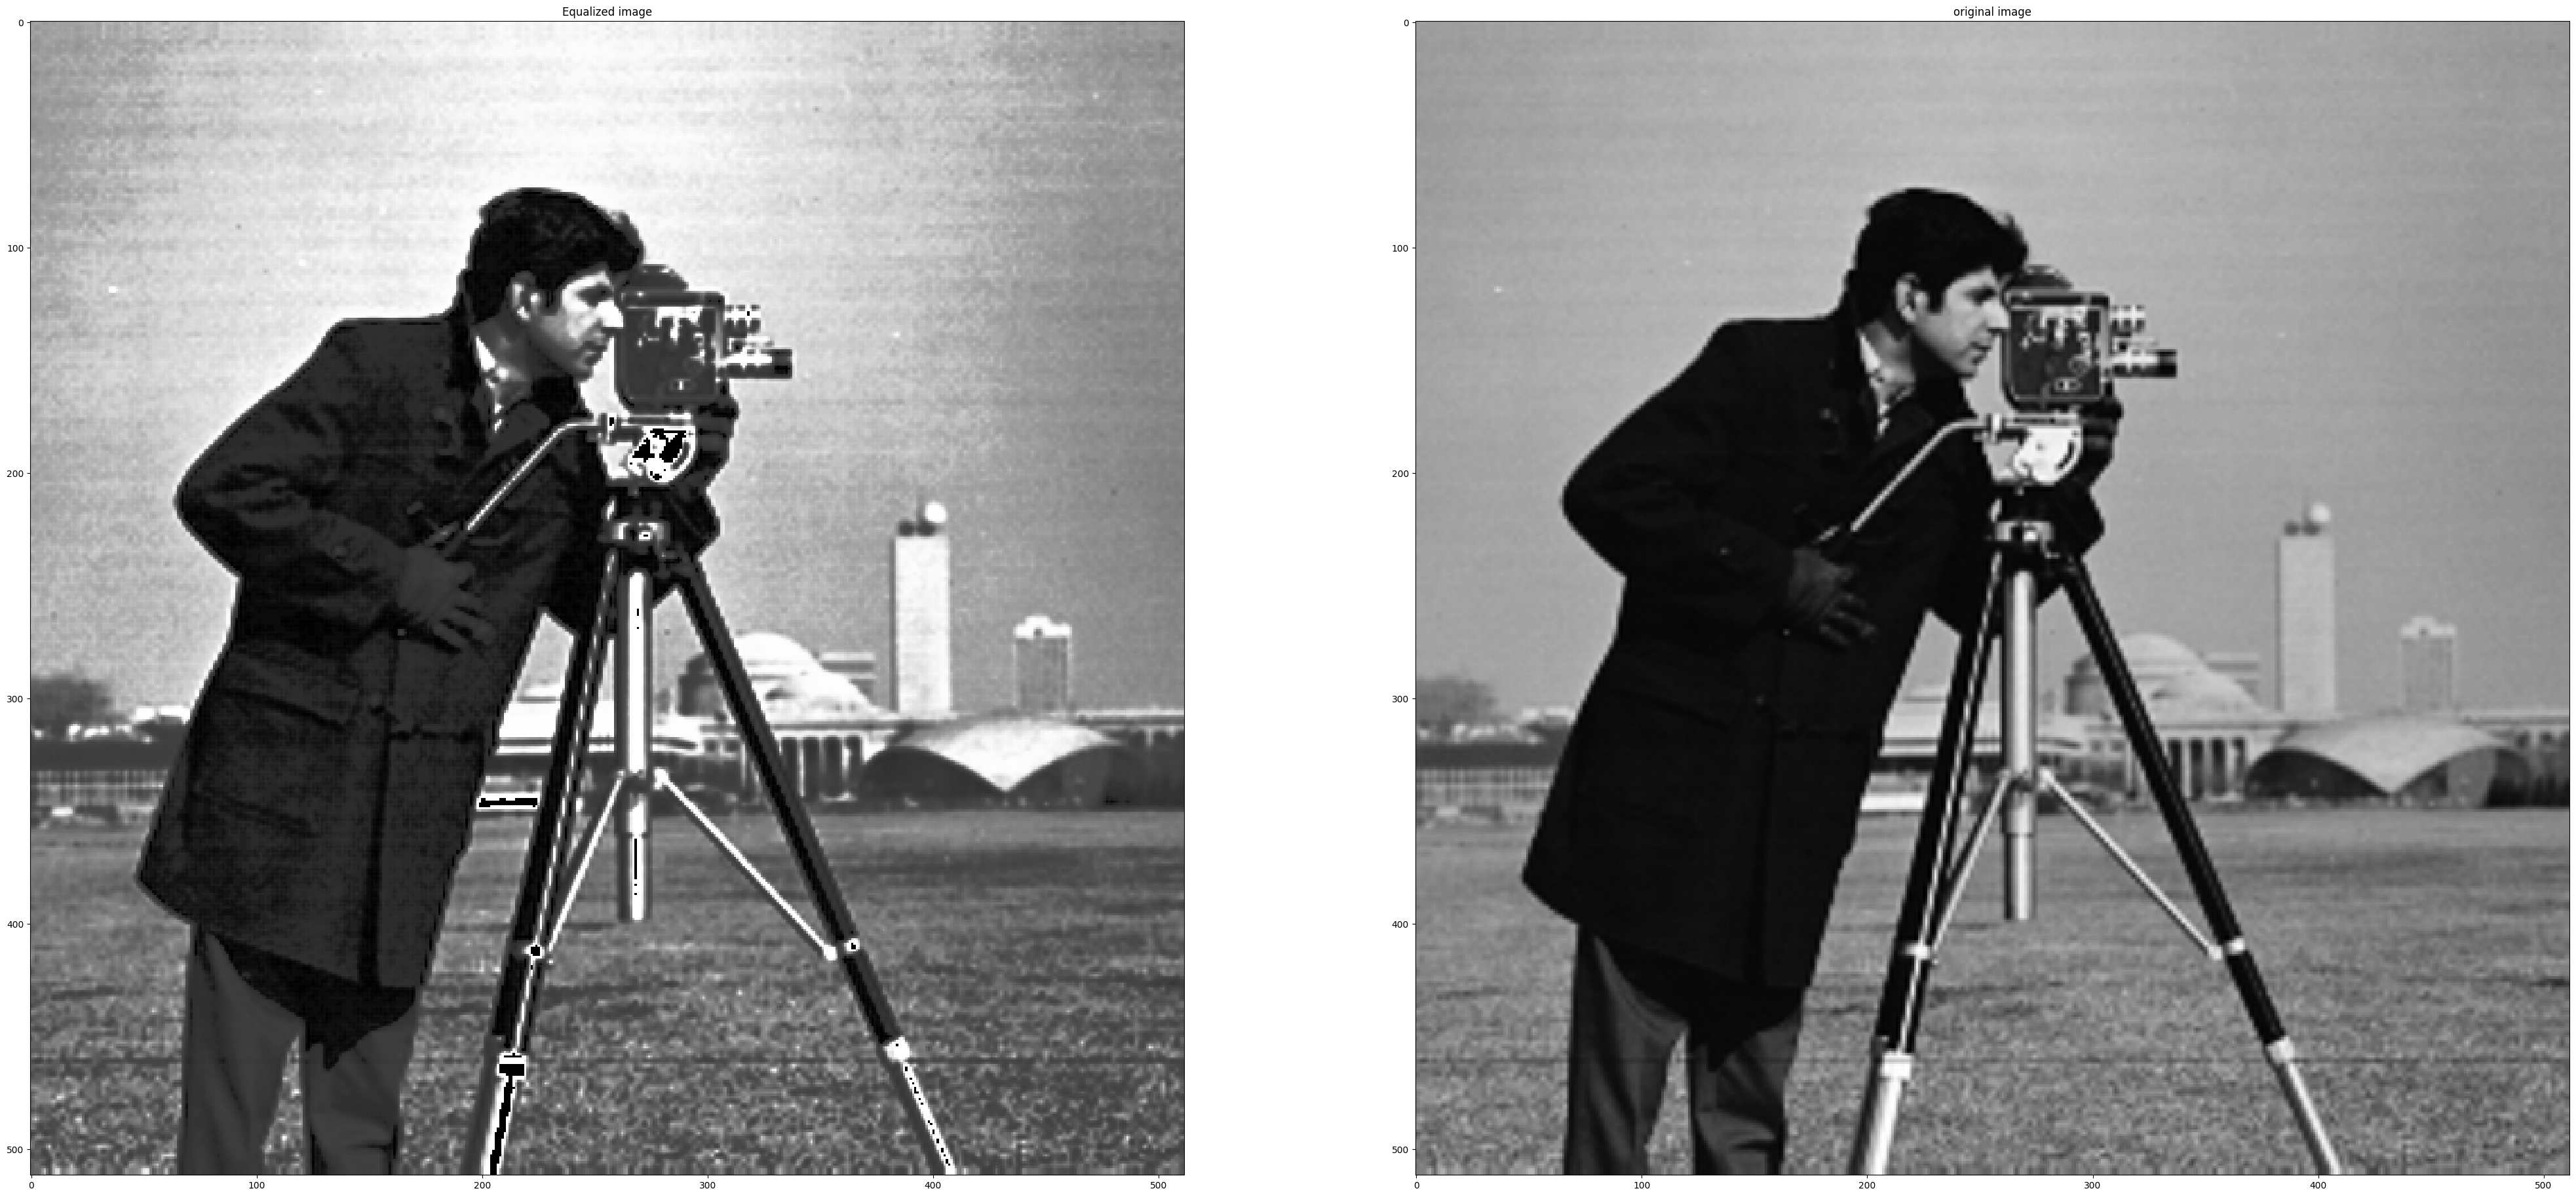

In [4]:
hist_norm = hist / np.sum(hist)

# Create an array of zeros with the same shape as the histogram
intensity_transform = [0]*SCALE

intensity_transform[0] = hist_norm[0]
for i in range(1, SCALE):
    intensity_transform[i] = intensity_transform[i-1] + hist_norm[i]

intensity_transform = np.asanyarray(intensity_transform)
intensity_transform *= SCALE
for i in range(0, SCALE):
    if intensity_transform[i] - int(intensity_transform[i]) > 0.5:
        intensity_transform[i] = int(intensity_transform[i]+1)
    else:
        intensity_transform[i] = int(intensity_transform[i])

new_image = img
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_image[i][j] = intensity_transform[img[i][j]]
        
fig, axs = plt.subplots(1, 2, figsize=(50, 25))
axs[0].imshow(new_image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Equalized image')

axs[1].imshow(img_copy, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('original image')


plt.show()

# Exercise 2.2.1

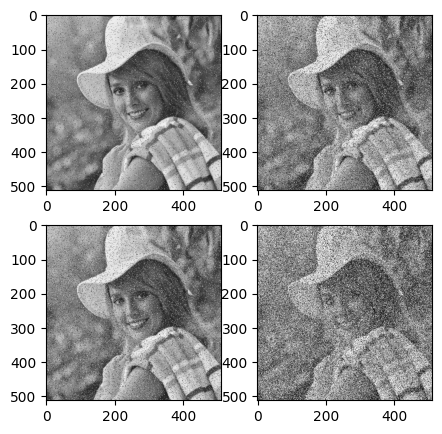

In [5]:
# Load an image
elaine_img = cv2.imread('images/Elaine.bmp', cv2.IMREAD_GRAYSCALE)

# Define a noise density (i.e., the proportion of pixels to be affected by noise)
noise_density = [0.05, 0.1, 0.2, 0.4]

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
j = 0.0
noisy_images = []
for i in range(len(noise_density)):
    # Generate a random mask of salt-and-pepper noise
    mask = np.random.choice((0, 1, 2), size=elaine_img.shape[:2], p=[1 - noise_density[i], noise_density[i]/2., noise_density[i]/2.])

    # Apply the mask to the image to add noise
    noisy_img = np.copy(elaine_img)
    noisy_img[mask == 1] = 255  # Salt noise
    noisy_img[mask == 2] = 0    # Pepper noise
    noisy_images.append(noisy_img)
    
    # Display the noisy image
    axs[i%2][int(j)].imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
    
    j += 0.5


In [6]:
def median_filter(noisy_image, size):
    filtered = np.zeros_like(noisy_image)
    for i in range(noisy_image.shape[0]):
        for j in range(noisy_image.shape[1]):
            diff_i = 0
            diff_j = 0
            if (i+size) > noisy_image.shape[0]:
                diff_i = i + size - noisy_image.shape[0]
                if (j+size) > noisy_image.shape[1]:
                    diff_j = j + size - noisy_image.shape[1]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j:j+size]
            elif (j+size) > noisy_image.shape[1]:
                diff_j = j + size - noisy_image.shape[1]
                if (i+size) > noisy_image.shape[0]:
                    diff_i = i + size - noisy_image.shape[0]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i:i+size, j-diff_j:noisy_image.shape[1]]
            else:
                neighborhood = noisy_image[i:i+size, j:j+size]
            median = np.median(neighborhood)
            filtered[i, j] = median
    return filtered

In [7]:
from sklearn.metrics import mean_squared_error

# set the window size
window_size = [3, 5, 7, 9]

# perform best median filtering for each image
best_windows = []

for i in range(len(noisy_images)):
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = median_filter(noisy_images[i], size=window_size[j])
        err = mean_squared_error(elaine_img,filtered_img)
        print(f"got error={err} for noisy image {i} with window_size={window_size[j]}")
        if err < min_error:
            min_error = err
            best_win = window_size[j]
    best_windows.append(best_win)

for i in range(len(best_windows)):
    print(f'best window for image {i} is {best_windows[i]}')
# display the filtered image
# plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)
# plt.show()

got error=39.31185531616211 for noisy image 0 with window_size=3
got error=50.32352828979492 for noisy image 0 with window_size=5
got error=58.38795852661133 for noisy image 0 with window_size=7
got error=64.56605529785156 for noisy image 0 with window_size=9
got error=39.88127899169922 for noisy image 1 with window_size=3
got error=50.40956115722656 for noisy image 1 with window_size=5
got error=58.37163543701172 for noisy image 1 with window_size=7
got error=64.58332824707031 for noisy image 1 with window_size=9
got error=41.1758918762207 for noisy image 2 with window_size=3
got error=50.8685188293457 for noisy image 2 with window_size=5
got error=58.60363006591797 for noisy image 2 with window_size=7
got error=64.71391677856445 for noisy image 2 with window_size=9
got error=46.25175476074219 for noisy image 3 with window_size=3
got error=52.074241638183594 for noisy image 3 with window_size=5
got error=58.93073272705078 for noisy image 3 with window_size=7
got error=64.6919288635253

# Exercise 2.2.2

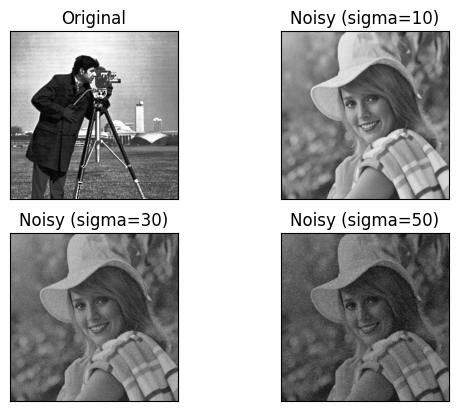

In [8]:
# Define the standard deviations for the Gaussian noise
sigmas = [10, 30, 50]

# Add Gaussian noise to the image with different variances
noisy_imgs = []
for sigma in sigmas:
    noise = np.uint8(np.clip(np.random.normal(loc=0, scale=sigma, size=elaine_img.shape), 0, 255))
    noisy_img = cv2.addWeighted(elaine_img, 0.5, noise, 0.5, 0)
    noisy_imgs.append(noisy_img)

# Display the original image and the noisy images
titles = ['Original', 'Noisy (sigma=10)', 'Noisy (sigma=30)', 'Noisy (sigma=50)']
images = [img] + noisy_imgs

for i in range(len(titles)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
def average_filter(noisy_image, size):
    filtered = np.zeros_like(noisy_image)
    for i in range(noisy_image.shape[0]):
        for j in range(noisy_image.shape[1]):
            diff_i = 0
            diff_j = 0
            if (i+size) > noisy_image.shape[0]:
                diff_i = i + size - noisy_image.shape[0]
                if (j+size) > noisy_image.shape[1]:
                    diff_j = j + size - noisy_image.shape[1]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j:j+size]
            elif (j+size) > noisy_image.shape[1]:
                diff_j = j + size - noisy_image.shape[1]
                if (i+size) > noisy_image.shape[0]:
                    diff_i = i + size - noisy_image.shape[0]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i:i+size, j-diff_j:noisy_image.shape[1]]
            else:
                neighborhood = noisy_image[i:i+size, j:j+size]
            median = np.mean(neighborhood)
            filtered[i, j] = median
    return filtered

In [10]:
window_size = [3, 5, 7, 9]

# perform median filtering for each image
for i in range(len(noisy_imgs)):
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = median_filter(noisy_imgs[i], size=window_size[j])
        err = mean_squared_error(elaine_img,filtered_img)
        print(f"got error={err} for noisy image {i} with window_size={window_size[j]} by median filtering")

            
# perform average filtering for each image
for i in range(len(noisy_imgs)):
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = average_filter(noisy_imgs[i], size=window_size[j])
        err = mean_squared_error(elaine_img,filtered_img)
        print(f"got error={err} for noisy image {i} with window_size={window_size[j]} by average filtering")

got error=116.84909439086914 for noisy image 0 with window_size=3 by median filtering
got error=115.82752990722656 for noisy image 0 with window_size=5 by median filtering
got error=115.47454452514648 for noisy image 0 with window_size=7 by median filtering
got error=115.0507926940918 for noisy image 0 with window_size=9 by median filtering
got error=117.05056762695312 for noisy image 1 with window_size=3 by median filtering
got error=115.98083877563477 for noisy image 1 with window_size=5 by median filtering
got error=115.29109573364258 for noisy image 1 with window_size=7 by median filtering
got error=114.67862701416016 for noisy image 1 with window_size=9 by median filtering
got error=116.76232528686523 for noisy image 2 with window_size=3 by median filtering
got error=115.96246337890625 for noisy image 2 with window_size=5 by median filtering
got error=115.2673110961914 for noisy image 2 with window_size=7 by median filtering
got error=114.67513656616211 for noisy image 2 with wind

# Exercise 2.2.3

In [21]:
def convert_type1(image, kernel):
    filtered = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if j == 0:
                filtered[i][j] = np.sum(kernel[1:3]  * image[i][0:2])
            elif j == image.shape[1]-1:
                filtered[i][j] = np.sum(kernel[0:2]  * image[i][j-1:image.shape[1]])
            else:
                filtered[i][j] = np.sum(kernel  * image[i][j-1:j+2])
    return filtered

In [58]:
def convert_type2(image, kernel):
    filtered = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # print(f'i = {i} and j = {j}')
            if j == 0:
                if i == 0:
                    filtered[i][j] = np.sum(kernel[1:3, 1:3]  * image[0:2, 0:2])
                elif i == image.shape[0]-1:
                    filtered[i][j] = np.sum(kernel[0:2, 1:3]  * image[i-1:i+1, 0:2])
                else:
                    filtered[i][j] = np.sum(kernel[0:3, 1:3]  * image[i-1:i+2, 0:2])                
            elif j == image.shape[1]-1:
                if i == 0:
                    filtered[i][j] = np.sum(kernel[1:3, 0:2]  * image[0:2, j-1:j+1])
                elif i == image.shape[0]-1:
                    filtered[i][j] = np.sum(kernel[0:2, 0:2]  * image[i-1:i+1, j-1:j+1])
                else:
                    filtered[i][j] = np.sum(kernel[0:3, 0:2]  * image[i-1:i+2, j-1:j+1])
            elif i == 0:
                filtered[i][j] = np.sum(kernel[1:3, 0:3]  * image[0:2, j-1:j+2])
            elif i == image.shape[0]-1:
                filtered[i][j] = np.sum(kernel[0:2, 0:3]  * image[i-1:i+1, j-1:j+2])
            else:
                filtered[i][j] = np.sum(kernel  * image[i-1:i+2, j-1:j+2])

    return filtered

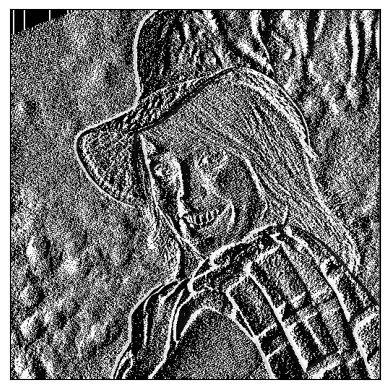

In [23]:
# Define the kernel
kernel = 1/2 * np.array([1, 0, -1])
filtered_image1 = convert_type1(elaine_img, kernel)

plt.imshow(filtered_image1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

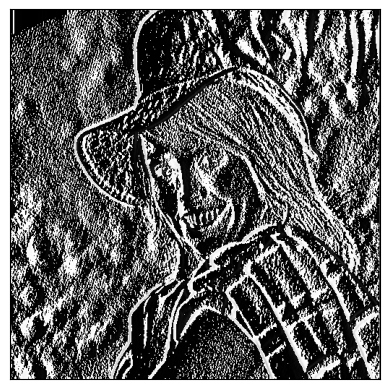

In [59]:
# Define the kernel
kernel = 1/6 * np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
filtered_image2 = convert_type2(elaine_img, kernel)


plt.imshow(filtered_image2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

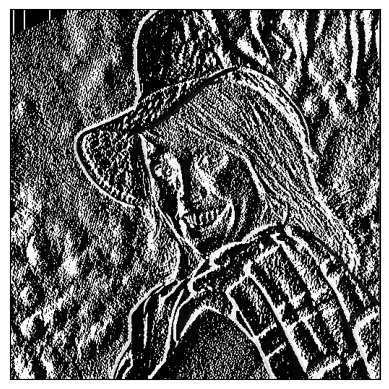

In [60]:
# Define the kernel
kernel = 1/8 * np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
filtered_image2 = convert_type2(elaine_img, kernel)


plt.imshow(filtered_image2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Exercise 2.2.4

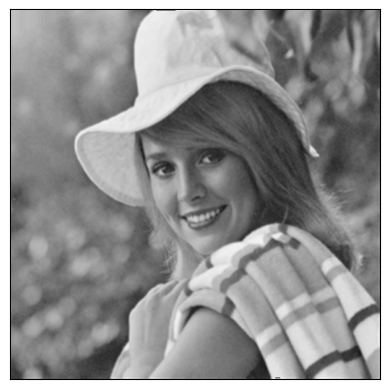

In [72]:
def sophisticated_image_processor(image):
    window_size = [3, 5, 7, 9]
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = average_filter(image, size=window_size[j])
        err = mean_squared_error(image,filtered_img)
        if err < min_error:
            min_error = err
            best_win = window_size[j]
    # first attempt, best average filter
    filtered_img1 = average_filter(image, size=best_win)
    
    kernels = [1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]), 
               1/10 * np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]]),
               1/16  * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])]
    min_error = 99999999
    best_kernel = None
    for j in range(len(kernels)):
        filtered_img = convert_type2(filtered_img1, kernels[j])
        err = mean_squared_error(filtered_img1,filtered_img)
        if err < min_error:
            min_error = err
            best_kernel = kernels[j]
    # second attempt, best smoothing filter
    filtered_img2 = convert_type2(filtered_img1, best_kernel)
    
    kernels = [np.array([[0, -1, 0], [-1, 5,-1],[0, -1, 0]]), 
               np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]])]
    min_error = 99999999
    best_kernel = None
    for j in range(len(kernels)):
        filtered_img = convert_type2(filtered_img1, kernels[j])
        err = mean_squared_error(filtered_img1,filtered_img)
        if err < min_error:
            min_error = err
            best_kernel = kernels[j]
    # third attempt,  filter
    filtered_img3 = convert_type2(filtered_img2, best_kernel)
    
    plt.imshow(filtered_img3, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
sophisticated_image_processor(elaine_img)